# Motion of a 1D Oscillator
---
PRE-REQUISITES:
- [ode-solve-euler.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/ode-solve-euler.ipynb)

SEE ALSO:
- [pendulum.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/pendulum.ipynb)
- [projectile.ipynb](https://github.com/ejwest2/NumericalMethods/blob/master/ODESolve/projectile.ipynb)

In [22]:
%run euler_step.py
%run euler_midpt_step.py
%run euler_meanval_step.py

<IPython.core.display.Javascript object>


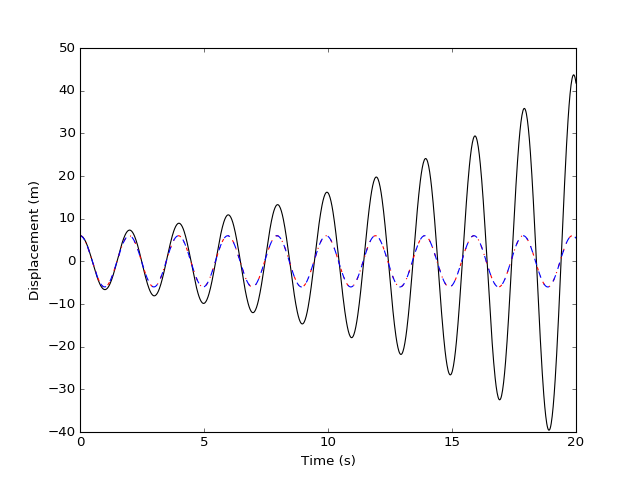

In [23]:
# oscillator
"""
Program to compute the motion of a one-dimensional oscillator
"""

import numpy as np

# oscillator rhs function
def f (t, x):
    dxdt = np.zeros(2)
    dxdt[0] = x[1]
    dxdt[1] = -omega0**2*x[0] - 2*beta*x[1] + F(t, f0, omegaF)
    return dxdt

# driving force
def F(t, amp, freq):
    return amp*np.cos(freq*t)

# set model parameters
#m = float(input('Enter mass of oscillator (in kg): '))
#K = float(input('Enter spring constant (in kg/s^2): '))
mass = 1.0
springK = 10.0
omega0 = np.sqrt(springK/mass)
beta = 0.0
f0 = 0.0
omegaF = 0.*omega0

# set initial position and velocity 
#x0 = float(input('Enter initial position (in m): '))
#v0 = float(input('Enter initial velocity (in m/s): '))
x0 = 6.0
v0 = 0.0

# number of steps, time grid, stepsize
#tStart = float(input('Enter start time (in seconds): ')) 
#tEnd = float(input('Enter end time (in seconds): ')) 
#nsteps = int(input('Enter number of time steps: ')) 
tStart = 0.0
tEnd = 20.0
nsteps = 1000
h = (tEnd - tStart)/nsteps
t = np.linspace(tStart, tEnd, nsteps + 1)
#print('Stepsize = %g \n' % h)

# initialize output arrays (euler)
x = np.zeros((2, nsteps + 1))
x[0] = x0
x[1] = v0

# initialize output arrays (midpoint euler)
x_mid = np.zeros_like(x)
x_mid[0] = x[0]
x_mid[1] = x[1]

# initialize output arrays (mean-value euler)
x_mv = np.zeros_like(x)
x_mv[0] = x[0]
x_mv[1] = x[1]

# numerical solution 
for i in range(0, nsteps): 

    # apply ODE-solver step
    x[:,i+1] = euler_step(t[i], x[:,i], f, h)
    x_mid[:,i+1] = euler_midpt_step(t[i], x_mid[:,i], f, h)
    x_mv[:,i+1] = euler_meanval_step(t[i], x_mv[:,i], f, h)
    t[i+1] = t[i] + h

# plot the results
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax1 = plt.subplots(1,1)

ax1.plot(t, x[0,:],'k-', label='simple Euler')
ax1.plot(t, x_mid[0,:],'r-.', label='midpoint Euler')
ax1.plot(t, x_mv[0,:],'b--', label='mean-value Euler')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement (m)')

fig.show()